# Keras and Tensorflow

In [1]:
import numpy as np
import shutil
import os
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
x_test = x_test / 255.0
x_train = x_train / 255

y_train = tf.keras.utils.to_categorical(y = y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y = y_test, num_classes = 10)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000, seed=42).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


2022-06-05 19:38:34.792435: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-05 19:38:34.792558: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=10, activation='softmax')
    ]
)

In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["categorical_accuracy"]
)

history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2022-06-05 19:38:35.668835: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-05 19:38:35.822389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 6ms/step - loss: 0.4682 - categorical_accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3036 - categorical_accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2832 - categorical_accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2730 - categorical_accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2666 - categorical_accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2617 - categorical_accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2580 - categorical_accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2552 - categorical_accuracy: 0.9285
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2527 - categ

In [6]:
model.evaluate(x_test, y_test)

 17/313 [>.............................] - ETA: 1s - loss: 0.2573 - categorical_accuracy: 0.9246

2022-06-05 19:40:24.288847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.2664 - categorical_accuracy: 0.9290


[0.2663877308368683, 0.9290000200271606]

In [7]:
v = np.argmax(model.predict(x_test), axis=1)
y = np.argmax(y_test, axis=1)

print(np.sum(v != y), "/", len(v))

2022-06-05 19:40:26.311195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


710 / 10000


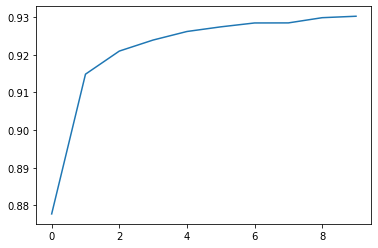

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])

In [9]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## DNN

In [10]:
model_dnn = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=400, activation='relu'),
        tf.keras.layers.Dense(units=100, activation='relu'),
        # optional, to provide some regularization. actually, on the validation test, it gives worse results with it
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(units=10, activation='softmax')
    ]
)

model_dnn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["categorical_accuracy"]
)

history = model_dnn.fit(x_train, y_train, epochs=10)

Epoch 1/10


2022-06-05 19:40:27.541620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2186 - categorical_accuracy: 0.9349
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0923 - categorical_accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0650 - categorical_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0490 - categorical_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0394 - categorical_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0322 - categorical_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0264 - categorical_accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0252 - categorical_accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0207 - categ

In [11]:
print(history.history.keys())

#plt.plot(history.history['categorical_accuracy'])
#plt.plot(history.history['loss'])

v = np.argmax(model_dnn.predict(x_test), axis=1)
y = np.argmax(y_test, axis=1)

print(np.sum(v != y), "/", len(v))

dict_keys(['loss', 'categorical_accuracy'])


2022-06-05 19:42:35.191427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


171 / 10000


In [12]:
tf.keras.utils.plot_model(model_dnn)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Convolutional Neural Networks

In [13]:
model_cnn = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=[28, 28, 1]),
        tf.keras.layers.Conv2D(
            filters=4, # 4 convolutions layers trained in parallel
            kernel_size=3, 
            strides=(2, 2), # stride 2 decreases the size by 2 per dimension
            padding='same',
            activation='relu'
        ), 

        # here can come more convolutional layers
        # stride (2, 2) will decrease the size / 2

        # or a MaxPooling. Recently more Conv2D layers are prefered to MaxPooling
        tf.keras.layers.MaxPooling2D(
            pool_size=(2, 2),
             padding='same'
        ),

        # flatten comes after the convolution layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=100, activation='relu'),
        tf.keras.layers.Dense(units=50, activation='relu'),
        
        tf.keras.layers.Dense(units=10, activation='softmax')
    ]
)

model_cnn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["categorical_accuracy"]
)

history = model_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10


2022-06-05 19:42:36.226229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 7ms/step - loss: 0.3067 - categorical_accuracy: 0.9077
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1277 - categorical_accuracy: 0.9600
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0989 - categorical_accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0828 - categorical_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0719 - categorical_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0616 - categorical_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0556 - categorical_accuracy: 0.9819
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0497 - categorical_accuracy: 0.9837
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0456 - categ

In [14]:
v = np.argmax(model_cnn.predict(x_test), axis=1)
y = np.argmax(y_test, axis=1)

print(np.sum(v != y), "/", len(v))

2022-06-05 19:44:57.466602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250 / 10000
